# Morphological PCAs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import toyplot
import toyplot.svg

## Load data

In [ ]:
df = pd.read_csv("../../Raw_data/leaf_traits_measurements.tsv", 
                 sep="\t",
                 )

In [4]:
pd.set_option('display.max_columns', None)  
df.head(1)

,new_name,N,area,densityt,ar,angleb,anglet,area_sd,area_se,densityt_sd,densityt_se,ar_sd,ar_se,angleb_sd,angleb_se,anglet_sd,anglet_se,trichome,type,region,logarea,logteeth,logar,type3,Unnamed: 24
0,ayavacense,ayavacense,14,24.850143,0.176843,1.86264,126.436929,68.885,13.623485,3.64103,0.136851,0.036575,0.235615,0.062971,29.778054,7.95852,29.054844,7.765234,1,IGE,ec_peru,3.212864,-1.732493,0.621995,GE


In [5]:
df.columns

Index(['new_name', 'N', 'area', 'densityt', 'ar', 'angleb', 'anglet',
       'area_sd', 'area_se', 'densityt_sd', 'densityt_se', 'ar_sd', 'ar_se',
       'angleb_sd', 'angleb_se', 'anglet_sd', 'anglet_se', 'trichome', 'type',
       'region', 'logarea', 'logteeth', 'logar', 'type3', 'Unnamed: 24'],
      dtype='object')

## Check correlation between variables

In [6]:
cov_data = np.corrcoef(df[["area","densityt",'ar', 'angleb', 'anglet']].T)
cov_data

array([[ 1.        ,  0.07212161, -0.10568972,  0.01725753,  0.03859539],
       [ 0.07212161,  1.        ,  0.2561206 , -0.39276514,  0.25548681],
       [-0.10568972,  0.2561206 ,  1.        , -0.65708715,  0.66130851],
       [ 0.01725753, -0.39276514, -0.65708715,  1.        , -0.83560017],
       [ 0.03859539,  0.25548681,  0.66130851, -0.83560017,  1.        ]])

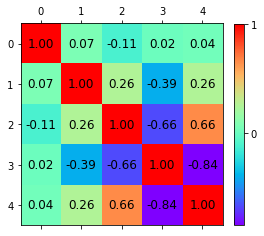

In [7]:
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

## PCAs

### PCA using log_variables

In [501]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[["logarea","logteeth",'logar']])
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['pc1', 'pc2'],
                           index=df["new_name"].values)

In [502]:
def plot_pcas_cats(pca_df, original_df, column_categories, note="", save_files=False, loadings=None):
    canvas = toyplot.Canvas(width=400, height=400)
    axes = canvas.cartesian(show=False)
    axes.hlines(0, style={"stroke-dasharray": 5, "stroke-width": 2})
    axes.vlines(0, style={"stroke-dasharray": 5, "stroke-width": 2})

    #define target region, in this pubescence will be marketd
    # target_region = "central"
    
    #get categories from original df
    categories = set(df[column_categories].values)

    marks_for_legend = []
    
    #plot points region by region to control colors
    for category in categories:
        subdf = pca_df[original_df[column_categories] == category]

        mark = axes.scatterplot(subdf['pc1'],
                                subdf['pc2'],
#                                 color=colors,
                                title=subdf.index,
                                size=7,
                                mstyle=None
                               )
        
        marks_for_legend.append((category,mark.markers[0]))
 
        
    canvas.text(50, 20, f"{note}{column_categories}", style={"font-size":"12px"});
    
    
    if loadings:
        coeff = np.transpose(loadings.components_[0:2, :])
        n = coeff.shape[0]

        for i in range(n):
            loading_x = coeff[i,0]
            loading_y = coeff[i,1]
            loading_name = original_df.loc[:, features].columns[i]
            axes.plot([0, loading_x],[0, loading_y], color="black")
            axes.text(loading_x*1.5,loading_y*1.5, loading_name, color="black", style={"font-size":"16px"})

       
    
    
    #put legend
    canvas.legend(marks_for_legend, corner=("right", 0, 60, 11*len(categories)))
    
    if save_files:
        toyplot.svg.render(canvas, f"{note}{column_categories}-PCAplot.svg")

In [503]:
plot_pcas_cats(principalDf, df, "type", "logvars_")

<svg class="toyplot-canvas-Canvas" height="400.0px" id="t41599b10ca3a47f58adfdf257f1b8775" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 400.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> reticulatum jamesonii pichinchense lasiophyllum undulatum stellato_tomentosum jucundum disjunctum discolor new_sp_1 sulcatum microcarpum tiliaefolium ayavacense seemenii toronis hallii tinoides2 subsessile tinoides1 costaricanum hartwegii villosum alpinum new_sp_2 fuscum caudatum triphyllum_new dumatorum triphyllum obtusatum lautum blandum acutifolium microphyllum membranaceum hirsutum ciliatum stenocalyx loeseneri dentatum logvars_type LPT IGE SGE D

In [504]:
plot_pcas_cats(principalDf, df, "type", "logvars_", loadings=pca)

<svg class="toyplot-canvas-Canvas" height="400.0px" id="t643fe66c54134770964b05ec29d003e2" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 400.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> reticulatum jamesonii pichinchense lasiophyllum undulatum stellato_tomentosum jucundum disjunctum discolor new_sp_1 sulcatum microcarpum tiliaefolium ayavacense seemenii toronis hallii tinoides2 subsessile tinoides1 costaricanum hartwegii villosum alpinum new_sp_2 fuscum caudatum triphyllum_new dumatorum triphyllum obtusatum lautum blandum acutifolium microphyllum membranaceum hirsutum ciliatum stenocalyx loeseneri dentatum area densityt ar logvars_type LPT IGE SGE D

In [505]:
plot_pcas_cats(principalDf, df, "type", "logvars_", save_files=True, loadings=pca)

### PCA Using raw variables

In [506]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[["area","densityt",'ar']])
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['pc1', 'pc2'],
                           index=df["new_name"].values)

In [507]:
plot_pcas_cats(principalDf, df, "type", "no_log_vars_")

<svg class="toyplot-canvas-Canvas" height="400.0px" id="tdcb5a3d138c348e1b7cb025dafe9d4aa" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 400.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> reticulatum jamesonii pichinchense lasiophyllum undulatum stellato_tomentosum jucundum disjunctum discolor new_sp_1 sulcatum microcarpum tiliaefolium ayavacense seemenii toronis hallii tinoides2 subsessile tinoides1 costaricanum hartwegii villosum alpinum new_sp_2 fuscum caudatum triphyllum_new dumatorum triphyllum obtusatum lautum blandum acutifolium microphyllum membranaceum hirsutum ciliatum stenocalyx loeseneri dentatum no_log_vars_type LPT IGE SGE D

In [508]:
plot_pcas_cats(principalDf, df, "type", "no_log_vars_", loadings=pca)

<svg class="toyplot-canvas-Canvas" height="400.0px" id="t458e8e4dd6fd4ade97ac87faad23c723" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 400.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> reticulatum jamesonii pichinchense lasiophyllum undulatum stellato_tomentosum jucundum disjunctum discolor new_sp_1 sulcatum microcarpum tiliaefolium ayavacense seemenii toronis hallii tinoides2 subsessile tinoides1 costaricanum hartwegii villosum alpinum new_sp_2 fuscum caudatum triphyllum_new dumatorum triphyllum obtusatum lautum blandum acutifolium microphyllum membranaceum hirsutum ciliatum stenocalyx loeseneri dentatum area densityt ar no_log_vars_type LPT IGE SGE D

In [509]:
plot_pcas_cats(principalDf, df, "type", "no_log_vars_", save_files=True, loadings=pca)

### PCA with standarized variables using sklearn StandardScaler (mean 0 var 1)

In [510]:
from sklearn.preprocessing import StandardScaler
features = ["area","densityt",'ar']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['new_name']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [511]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalStandComponents = pca.fit_transform(x)
principalStandDf = pd.DataFrame(data = principalStandComponents, 
                           columns = ['pc1', 'pc2'],
                           index=df["new_name"].values)

In [512]:
plot_pcas_cats(principalStandDf, df,"type", "std_m0_var1_")

<svg class="toyplot-canvas-Canvas" height="400.0px" id="t63ef49c20a194c4f93a12e85c824afa7" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 400.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> reticulatum jamesonii pichinchense lasiophyllum undulatum stellato_tomentosum jucundum disjunctum discolor new_sp_1 sulcatum microcarpum tiliaefolium ayavacense seemenii toronis hallii tinoides2 subsessile tinoides1 costaricanum hartwegii villosum alpinum new_sp_2 fuscum caudatum triphyllum_new dumatorum triphyllum obtusatum lautum blandum acutifolium microphyllum membranaceum hirsutum ciliatum stenocalyx loeseneri dentatum std_m0_var1_type LPT IGE SGE D

In [513]:
plot_pcas_cats(principalStandDf, df, "type", "std_m0_var1_", loadings=pca)

<svg class="toyplot-canvas-Canvas" height="400.0px" id="td0b27998826e45e0862992c07399b1f7" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 400.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> reticulatum jamesonii pichinchense lasiophyllum undulatum stellato_tomentosum jucundum disjunctum discolor new_sp_1 sulcatum microcarpum tiliaefolium ayavacense seemenii toronis hallii tinoides2 subsessile tinoides1 costaricanum hartwegii villosum alpinum new_sp_2 fuscum caudatum triphyllum_new dumatorum triphyllum obtusatum lautum blandum acutifolium microphyllum membranaceum hirsutum ciliatum stenocalyx loeseneri dentatum area densityt ar std_m0_var1_type LPT IGE SGE D

In [514]:
plot_pcas_cats(principalStandDf, df, "type", "std_m0_var1_", save_files=True, loadings=pca)

### PCAs per region

In [4]:
from sklearn.preprocessing import StandardScaler
features = ["area","densityt",'ar']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['new_name']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [756]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalStandComponents = pca.fit_transform(x)
principalStandDf = pd.DataFrame(data = principalStandComponents, 
                           columns = ['pc1', 'pc2'],
                           index=df["new_name"].values)

In [758]:
#add regions to principalcomponents df
principalStandDf["regions"] = targets

In [813]:
def plot_pcas_regions_types(principalDf, pca, regions, save_files=False, color_per_region=True, colored_axis=True):
    canvas = toyplot.Canvas(width=1200, height=800)
    for idx, target_region in enumerate(regions):
#         canvas = toyplot.Canvas(width=400, height=400)
        axes = canvas.cartesian(show=False, grid=(3, 4, idx))
    
        if colored_axis:
            axes.hlines(0, color=colors_imap[target_region], style={"stroke-dasharray": 5, "stroke-width": 4})
            axes.vlines(0, color=colors_imap[target_region], style={"stroke-dasharray": 5, "stroke-width": 4})
        else:
            axes.hlines(0, color="black", style={"stroke-dasharray": 5, "stroke-width": 4})
            axes.vlines(0, color="black", style={"stroke-dasharray": 5, "stroke-width": 4})

        #define target region, in this pubescence will be marketd
        # target_region = "central"
        

        #plot points region by region to control colors
        for region in set(targets):
            subdf = principalDf[principalDf["regions"] == region]


            #iterate by species within regions to define colors by types
            colors = []

            for species in subdf[subdf["regions"] == region].index:
               

                #define if the point is for a target region or not
                if region == target_region:
                    if color_per_region:
                        #check if leaf type
                        lt = df.loc[df['new_name'] == species]["type"].values
                
                        #define colors based on type
                        if lt == "LPT": 
                            colors.append(toyplot.color.Palette()[0]) #LPT
                        elif lt == "IGE": 
                            colors.append(toyplot.color.Palette()[1]) #IGE
                        elif lt == "SGE":
                            colors.append(toyplot.color.Palette()[2]) #SGE
                        elif lt == "D":
                            colors.append(toyplot.color.Palette()[3]) #D
                    else:
                        colors.append("black")


                    size = 8
#                     style = {"stroke":"black"}
                    style = None
                else:
                    colors.append("lightgray")
#                     marker.append("+")
                    size = 8
                    style = {"opacity": 0.5}

            mark = axes.scatterplot(subdf['pc1'],
                                    subdf['pc2'],
                                    color=colors,
                                    title=subdf.index,
                                    size=size,
                                    mstyle=style,
#                                     marker=markers
                                   )
            
        axes.text(-3, 3, f"{target_region}", style={"font-size":"16px"},color="black");
            
            

        #loadings
        
        markers_colors_dict = {"LPT": toyplot.color.Palette()[0],
                "IGE": toyplot.color.Palette()[1],
                "SGE": toyplot.color.Palette()[2],
                "D": toyplot.color.Palette()[3],
               }

        if idx == len(regions)-1:
            
            axes = canvas.cartesian(show=False, grid=(3, 4, idx+1))
            axes.hlines(0, color="black", style={"stroke-dasharray": 5, "stroke-width": 4})
            axes.vlines(0, color="black", style={"stroke-dasharray": 5, "stroke-width": 4})

            mark = axes.scatterplot(principalDf['pc1'],
                                principalDf['pc2'],
#                                 color="lightgray",
                                color=[markers_colors_dict[df.loc[df['new_name'] == i]["type"].values[0]] for i in principalDf.index],
                                title=principalDf.index,
                                size=8,
                                mstyle={"opacity": 1.0},
#                                 marker=markers
                               )


            coeff = np.transpose(pca.components_[0:2, :])
            n = coeff.shape[0]

            for i in range(n):
                loading_x = coeff[i,0]
                loading_y = coeff[i,1]
                loading_name = df.loc[:, features].columns[i]
                axes.plot([0, loading_x],[0, loading_y], color="black")
                axes.text(loading_x*1.5,loading_y*1.5, loading_name, color="black", style={"font-size":"16px"})
            
            axes.text(-3, 3, f"Loadings", style={"font-size":"16px"},color="black");

            

    if save_files:
        toyplot.svg.render(canvas, f"allRegions-PCAplot2.svg")

In [814]:
plot_pcas_regions_types(principalStandDf, pca, set([i for i in targets if i != "out"]), color_per_region=True, colored_axis=False)

<svg class="toyplot-canvas-Canvas" height="800.0px" id="ta4e189e97a2c46e08e26c6865757ab1f" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 1200.0 800.0" width="1200.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> hirsutum ciliatum caudatum microcarpum tiliaefolium stenocalyx loeseneri hallii jamesonii pichinchense ayavacense triphyllum_new reticulatum toronis dentatum villosum alpinum new_sp_2 membranaceum new_sp_1 acutifolium microphyllum fuscum sulcatum lasiophyllum triphyllum tinoides2 hartwegii obtusatum jucundum lautum blandum disjunctum discolor subsessile undulatum tinoides1 dumatorum seemenii costaricanum stellato_tomentosum E.Mex hirsutum ciliatum caudatum microcarpum tiliaefolium stenocalyx loeseneri hallii jamesonii pichinchense ayavacense triphyllum_new reticulatum toronis dentatum villosum alpinum new_sp_2 membranaceum new_sp_1 acutifolium microphyllum fuscum sulcatum lasiophyllum triphyllum tinoides2 hartwegii obtusatum jucundum lautum blandum disjunctum discolor subsessile undulatum tinoides1 dumatorum seemenii costaricanum stellato_tomentosum W.Mex hirsutum ciliatum caudatum microcarpum tiliaefolium stenocalyx loeseneri hallii jamesonii pichinchense ayavacense triphyllum_new reticulatum toronis dentatum villosum alpinum new_sp_2 membranaceum new_sp_1 acutifolium microphyllum fuscum sulcatum lasiophyllum triphyllum tinoides2 hartwegii obtusatum jucundum lautum blandum disjunctum discolor subsessile undulatum tinoides1 dumatorum seemenii costaricanum stellato_tomentosum S.Col/N.Ecu hirsutum ciliatum caudatum microcarpum tiliaefolium stenocalyx loeseneri hallii jamesonii pichinchense ayavacense triphyllum_new reticulatum toronis dentatum villosum alpinum new_sp_2 membranaceum new_sp_1 acutifolium microphyllum fuscum sulcatum lasiophyllum triphyllum tinoides2 hartwegii obtusatum jucundum lautum blandum disjunctum discolor subsessile undulatum tinoides1 dumatorum seemenii costaricanum stellato_tomentosum S.Ecu/N.Peru hirsutum ciliatum caudatum microcarpum tiliaefolium stenocalyx loeseneri hallii jamesonii pichinchense ayavacense triphyllum_new reticulatum toronis dentatum villosum alpinum new_sp_2 membranaceum new_sp_1 acutifolium microphyllum fuscum sulcatum lasiophyllum triphyllum tinoides2 hartwegii obtusatum jucundum lautum blandum disjunctum discolor subsessile undulatum tinoides1 dumatorum seemenii costaricanum stellato_tomentosum Jam hirsutum ciliatum caudatum microcarpum tiliaefolium stenocalyx loeseneri hallii jamesonii pichinchense ayavacense triphyllum_new reticulatum toronis dentatum villosum alpinum new_sp_2 membranaceum new_sp_1 acutifolium microphyllum fuscum sulcatum lasiophyllum triphyllum tinoides2 hartwegii obtusatum jucundum lautum blandum disjunctum discolor subsessile undulatum tinoides1 dumatorum seemenii costaricanum stellato_tomentosum Oaxaca hirsutum ciliatum caudatum microcarpum tiliaefolium stenocalyx loeseneri hallii jamesonii pichinchense ayavacense triphyllum_new reticulatum toronis dentatum villosum alpinum new_sp_2 membranaceum new_sp_1 acutifolium microphyllum fuscum sulcatum lasiophyllum triphyllum tinoides2 hartwegii obtusatum jucundum lautum blandum disjunctum discolor subsessile undulatum tinoides1 dumatorum seemenii costaricanum stellato_tomentosum E.Col/Ven hirsutum ciliatum caudatum microcarpum tiliaefolium stenocalyx loeseneri hallii jamesonii pichinchense ayavacense triphyllum_new reticulatum toronis dentatum villosum alpinum new_sp_2 membranaceum new_sp_1 acutifolium microphyllum fuscum sulcatum lasiophyllum triphyllum tinoides2 hartwegii obtusatum jucundum lautum blandum disjunctum discolor subsessile undulatum tinoides1 dumatorum seemenii co

In [815]:
plot_pcas_regions_types(principalStandDf,pca, set([i for i in targets if i != "out"]), save_files=True, color_per_region=True, colored_axis=False)

### Cross tests PCA module instead of sklearn

In [472]:
from pca import pca

In [473]:
from sklearn.preprocessing import StandardScaler
features = ["area","densityt", "ar"]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['new_name']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [478]:
model = pca(n_components=0.95)

# Reduce the data towards 2 PCs
# model = pca(n_components=2)


# Fit transform
results = model.fit_transform(x)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [3] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


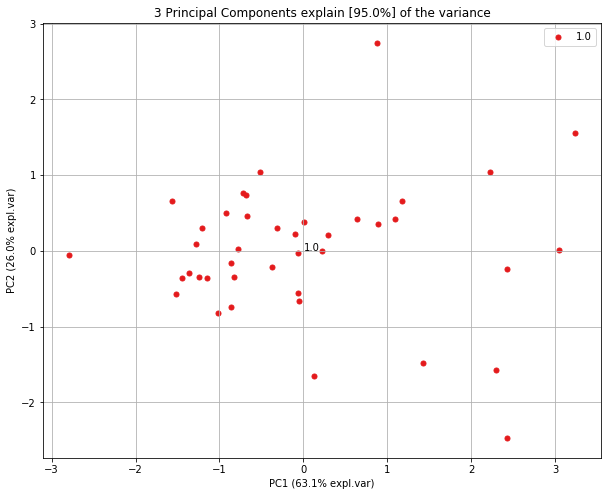

In [479]:
fig, ax = model.scatter()

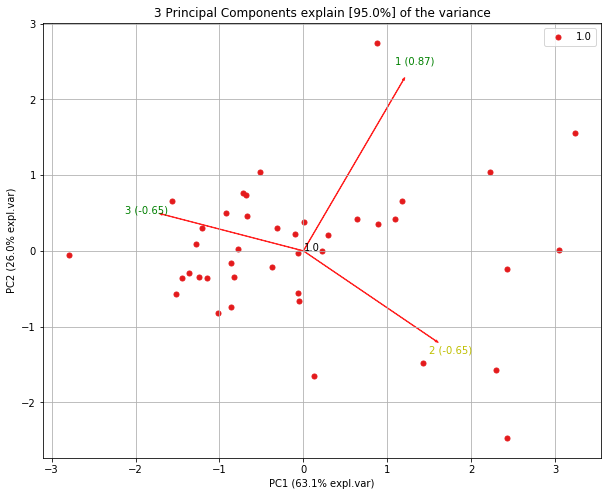

In [480]:
fig, ax = model.biplot(n_feat=3)